# Linear Regression
La régression linéaire à pour but de trouver la fonction linéaire qui représente/fit le mieux les données.
Un exemple classique est de générer des datas selon l'équation f(x)=ax+b dans l'objectif que le réseau retrouve les paramètres a et b.

Rappelez vous, le réseau cherche a optimisé le poids et le biais de l'équation wx+b, en bref le réseau sera bien entrainé quand w <=> a et le biais <=> b.


In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import random
rng = numpy.random
%matplotlib inline
print("everything imported")

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


everything imported


Nos Données


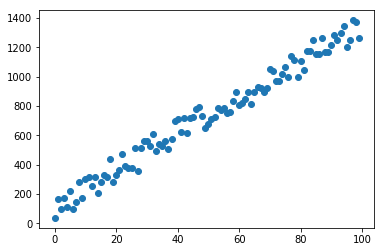

Ce qu'on souhaite faire


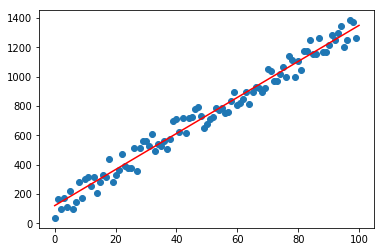

In [2]:
#On définie a et b, vous pouvez changer les valeurs si vous le souhaitez
a= 12.3
b= 120

input_data = numpy.array([])
labels = numpy.array([])
for i in range(100):
    coeff = random.randint(2,18)/10 #Du bruit
    labels = numpy.append(labels, [(a*i+b* coeff) ]) #nos lables sont les résultats de la fonction
    input_data = numpy.append(input_data,[i]) #nos input sont tout simplement x pour f(x)=ax+b
print("Nos Données")
plt.scatter(input_data, labels)
plt.show()
print("Ce qu'on souhaite faire")
line_x_range = (0, 100)
plt.scatter(input_data, labels)
plt.plot(line_x_range, [i * a + b for i in line_x_range], "r", alpha=1)
plt.show()

In [3]:
# Parameters
learning_rate = 0.0001 #vous pouvez vous amuser à modifier le learning rate pour observer son impact sur la convergence
                        #le temps de training et les valeurs de cout (attention aux NaN)
training_epochs = 6000 #Meme chose, vous pouvez modifier le nombre d'epoch

display_step = 100
#On crée les tableaux qui vont contenir les datas


# Training Data
train_Y = numpy.asarray(labels)
train_X = numpy.asarray(input_data)

n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# On défini pour tf le poids et le biais
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# On défini notre prédiction sous le model poids*x +biais
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_mean(tf.pow(pred-Y, 2))
# Gradient descent
#  Note, minimize() sait modifier W and b parce que les Variables sont à trainable= true par défaut
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialisateur de variables de tensorflow
init = tf.global_variables_initializer()

# Début du training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Entrainement du réseau
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            #print(x)
            #print(y)
            #print(sess.run(X, feed_dict={X: x, Y: y}))
            #On demande a tf de calculer l'optimizer , ce qui va le forcer à corriger W et b en fonction
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Affichage des logs
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Affichage graphique des données et de la courbe
    plt.plot(train_X, train_Y, label='Original data')
    plt.plot(line_x_range, [i * sess.run(W) + sess.run(b) for i in line_x_range], "b", alpha=1)
    #plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    '''
    # Testing example, as requested (Issue #2)
    test_Y = numpy.asarray([22.4, 34.7, 47.,  59.3, 71.6])
    test_X = numpy.asarray([0,1,2,3,4])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))
    
    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    '''

Epoch: 0100 cost= 19473.150390625 W= 11.5177555 b= 31.855408
Epoch: 0200 cost= 16901.806640625 W= 11.271586 b= 56.348602
Epoch: 0300 cost= 15198.212890625 W= 11.082159 b= 75.19596
Epoch: 0400 cost= 14050.075195312 W= 10.936393 b= 89.69944
Epoch: 0500 cost= 13262.962890625 W= 10.82423 b= 100.85988
Epoch: 0600 cost= 12714.451171875 W= 10.737909 b= 109.44819
Epoch: 0700 cost= 12326.206054688 W= 10.671487 b= 116.05665
Epoch: 0800 cost= 12047.397460938 W= 10.620379 b= 121.14202


KeyboardInterrupt: 

## Temps de cuisson d'un roti par rapport à son poids

Nous avons recueilli des données de cuisson de roti par rapport à leur poids depuis différents traiteurs. 

On admet que jusqu'à présent ceux-ci ne choissaient leur temps de cuisson qu'à l'instinct et par expérience.

Notre objectif est de leur fournir une formule simple pour qu'ils puissent la réutiliser lors de leurs futures cuissons
![alt text][roti]
[roti]: https://www.papillesetpupilles.fr/wp-content/uploads/2015/04/Roti-de-boeuf-cuisson-basse-temperature-600x806.jpg  "Roti"


In [ ]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
#géneration des données
def generate_data():
    poids = np.array([])
    temps = np.array([])
    for i in range(100):
        poids_random = random.randint(50,1800)
        bruit = random.randint(9,11)/10
        temps_cuisson = 0.075* poids_random * bruit
        poids = np.append(poids, [poids_random])
        temps = np.append(temps, [temps_cuisson])
    return poids, temps

In [ ]:
#hyperparamètres
learning_rate = 0.0001 #à effacer
training_epochs = 10000 #à effacer
display_step = 100

In [ ]:
#Graph
input_data, labels = generate_data()
train_X = numpy.asarray(input_data)
train_Y = numpy.asarray(labels)
n_samples = train_X.shape[0]
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")


pred = tf.add(tf.multiply(X, W), b) #à effacer

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)



In [ ]:
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y}) #a effacer

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y}) #a effacer
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_Y = numpy.asarray([22.4, 34.7, 47.,  59.3, 71.6])
    test_X = numpy.asarray([0,1,2,3,4])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
plt.show()